# Modern Slavery statements research
## Plotting distribution of word counts across statements

This notebook will show you how to (1) download the dataset of 12K modern slavery statements, (2) compute the distribution of word counts across statements, and (3) plot that distribution.

## Prerequisities


In [ ]:
!pip install modern-slavery-statements-research

Please ensure you can import the following packages:

In [12]:
import os, pickle, csv
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from string import punctuation
from tqdm import tqdm
from modern_slavery_statements_research.download_corpus import download

## 1 Download data

In [ ]:
access_key_id = '' # Enter your access_key_id between the commas
secret_access_key = '' # Enter your secret_access_key between the commas

download(
    aws_access_key_id=access_key_id,
    aws_secret_access_key=secret_access_key)


See [here](https://github.com/the-future-society/modern-slavery-statements-research/blob/master/README.md#how-to-access-the-data) for more information about data download and how to get these credentials if you do not have them.

Note that the download may take several hours, depending on your device and connection.

The data will download into one or more directories inside `modern_slavery_statements_research/notebooks`. Each directory is called `scraper_run` followed by a timestamp. Run the following to get the name of the most up-to-date directory.

In [23]:
scraper_run_dirs = []
with os.scandir('./') as iterator:
    for entry in iterator:
        if entry.path.startswith('./scraper_run'):
            scraper_run_dirs.append(entry.path)

scraper_run_dir = sorted(scraper_run_dirs)[-1] # get most recent scraper_run_dir

## 2 Compute word count distribution
Now we have a set of modern slavery statements as `.txt` files in this directory, it's time to count the number of words in each statement. The following code iterates through the statements to create a mapping from word count to the `url_id` of the statements with that word count.

In [ ]:
word_counts = []
with os.scandir(scraper_run_dir) as iterator:
    for txt_file in tqdm(iterator):
        assert txt_file.is_file()
        assert txt_file.name.endswith(".txt")
        # extract url_id and word count from the statement
        url_id = int(txt_file.name.strip('.txt'))
        with open(txt_file.path, encoding="utf8") as f: # some .txt files throw UnicodeDecodeError if this isn't specificied
            words_generator = chain.from_iterable(map(str.split, f))
            word_count = sum(1 for word in words_generator)
        word_counts.append(word_count)

## 3 Visualisation
Let's plot the word counts as a histogram. We'll use a log scale on the x-axis to improve interpretability, because word counts vary over several orders of magnitude between documents.

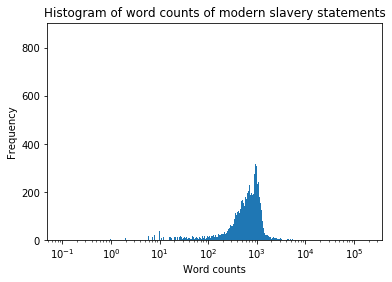

In [28]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(word_counts, bins=np.logspace(-1, np.log10(max(word_counts)), 500))
ax.set_xlabel('Word counts')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of word counts of modern slavery statements')
ax.set_xscale('log')
plt.show()